# Zillow Exploration Exercises

### 1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

### 2. Answer those questions through a mix of statistical tests and visualizations.

In [14]:
# imports
import wrangle_zillow
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.stats as stats


In [15]:
# get data
zillow = wrangle_zillow.wrangle_zillow(0.6, 0.8)
zillow

/Users/sostew/codeup-data-science/clustering-exercises/wrangle_zillow.py:75: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zillow_filt = zillow_filt[(zillow.bathroomcnt > 0) & (zillow.calculatedfinishedsquarefeet > 300)]


,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,roomcnt,yearbuilt,taxvaluedollarcnt,logerror,transactiondate,fips_loc
0,3.5,4.0,3100.0,6059,3.0,33634931.0,-117869207.0,0.0,1998.0,1023282.0,0.025595,2017-01-01,"Orange, CA"
1,1.0,2.0,1465.0,6111,1.0,34449266.0,-119281531.0,5.0,1967.0,464000.0,0.055619,2017-01-01,"Ventura, CA"
2,2.0,3.0,1243.0,6059,2.0,33886168.0,-117823170.0,6.0,1962.0,564778.0,0.005383,2017-01-01,"Orange, CA"
3,3.0,4.0,2376.0,6037,3.0,34245180.0,-118240722.0,0.0,1970.0,145143.0,-0.103410,2017-01-01,"Los Angeles, CA"
4,3.0,3.0,1312.0,6037,3.0,34185120.0,-118414640.0,0.0,1964.0,119407.0,0.006940,2017-01-01,"Los Angeles, CA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77375,3.0,3.0,1741.0,6037,3.0,34202400.0,-118502000.0,0.0,1980.0,379000.0,-0.002245,2017-09-20,"Los Angeles, CA"
77376,2.0,2.0,1286.0,6037,2.0,34245368.0,-118282383.0,0.0,1940.0,354621.0,0.020615,2017-09-20,"Los Angeles, CA"
77377,2.0,4.0,1612.0,6111,2.0,34300140.0,-118706327.0,7.0,1964.0,67205.0,0.013209,2017-09-21,"Ventura, CA"
77378,1.0,3.0,1032.0,6037,1.0,34040895.0,-118038169.0,0.0,1954.0,49546.0,0.037129,2017-09-21,"Los Angeles, CA"


#### Question 1: What are the individual distributions of the features?

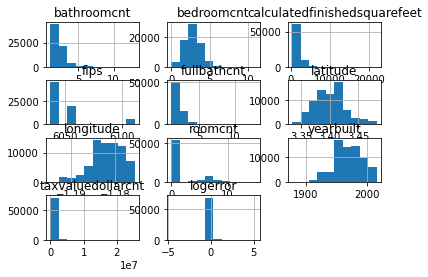

In [16]:
# view individual distributions of features
zillow.hist();

#### Answer 1:
- `bedroomcnt`, `yearbuilt` are normally distributed.
- There are outliers in `calculatedfinishedsquarefeet`, `bathroomcnt`, `bedroomcnt`, `fullbathcnt`, `roomcnt`, and `taxvaluedollarcnt`.
 - Removing outliers from `bathroomcnt` and `bedroomcnt` resolved the outlier issue for `roomcnt`.
- `taxvaluedollarcnt` has the biggest outlier problem
- Data needs to be scaled

At this point, I want to remove outliers since I intend to use clustering with this data. Once that has been completed, and before moving onto multivariate analysis, I will split the data.

In [17]:
# function to remove outliers
def remove_outliers(df, cols, k):
    '''
    This function takes in a list of column names from a dataframe and a 
    k-value which is used to specify the upper and lower bounds for
    removing outliers. It returns the dataframe with the outliers removed.
    '''
    # make for loop to remove outliers in each column
    for col in cols:
        # get quartiles
        q1, q3 = df[col].quantile([.25, .75])
        # compute iqr
        iqr = q3 - q1
        # get cutoff points for removing outliers
        upper = q3 + k * iqr
        lower = q1 - k * iqr
        # remove outliers
        df = df[(df[col]>lower)&(df[col]<upper)]
    return df

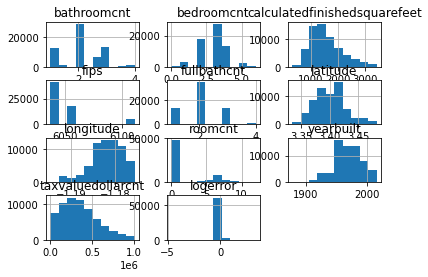

In [18]:
# remove outliers
zillow = remove_outliers(zillow, ['calculatedfinishedsquarefeet', 'bathroomcnt', 'bedroomcnt',
                        'fullbathcnt', 'taxvaluedollarcnt'], 1.5)
# view updated distributions
zillow.hist();

In [19]:
# function to split data
def split_data(df):
    '''
    This function takes in a dataframe and splits it into three dataframes.
    It returns these dataframes in this order: train, validate, test.
    Train makes up 56% of the total observations, validate 24%, and test 20%.
    '''
    from sklearn.model_selection import train_test_split
    train, test = train_test_split(df, test_size=0.2, random_state=123)
    train, validate = train_test_split(train, test_size=0.3, random_state=123)
    return train, validate, test
# split data
train, validate, test = split_data(zillow)
# preview train
train.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,roomcnt,yearbuilt,taxvaluedollarcnt,logerror,transactiondate,fips_loc
18386,2.0,4.0,1183.0,6037,2.0,34037012.0,-117964959.0,0.0,1955.0,51683.0,-0.047739,2017-03-20,"Los Angeles, CA"
18771,3.0,4.0,1984.0,6037,3.0,33805765.0,-118311926.0,0.0,1985.0,461539.0,-0.001810,2017-03-21,"Los Angeles, CA"
7859,1.5,2.0,1392.0,6059,1.0,33777778.0,-117928673.0,5.0,1973.0,161900.0,-0.001147,2017-02-03,"Orange, CA"
70211,1.0,2.0,1000.0,6037,1.0,34661493.0,-118396046.0,0.0,1963.0,176653.0,0.027273,2017-08-25,"Los Angeles, CA"
27043,3.0,3.0,2111.0,6037,3.0,34216953.0,-118568079.0,0.0,1969.0,116158.0,-0.031394,2017-04-17,"Los Angeles, CA"


In [20]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
bathroomcnt,35946.0,2.097480e+00,0.718996,1.000000e+00,2.000000e+00,2.000000e+00,2.500000e+00,4.000000e+00
bedroomcnt,35946.0,2.896706e+00,0.941101,0.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,6.000000e+00
calculatedfinishedsquarefeet,35946.0,1.556183e+03,584.159074,3.040000e+02,1.134000e+03,1.443000e+03,1.873750e+03,3.416000e+03
fips,35946.0,6.049118e+03,20.687157,6.037000e+03,6.037000e+03,6.037000e+03,6.059000e+03,6.111000e+03
fullbathcnt,35946.0,2.033606e+00,0.711986,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00
latitude,35946.0,3.400984e+07,270467.005841,3.333960e+07,3.381021e+07,3.401296e+07,3.418102e+07,3.481240e+07
longitude,35946.0,-1.181896e+08,359897.580269,-1.194484e+08,-1.184016e+08,-1.181549e+08,-1.179190e+08,-1.175546e+08
roomcnt,35946.0,1.581205e+00,2.849386,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01
yearbuilt,35946.0,1.968367e+03,22.427053,1.878000e+03,1.954000e+03,1.969000e+03,1.985000e+03,2.015000e+03
taxvaluedollarcnt,35946.0,3.584041e+05,218940.068240,1.000000e+03,1.876065e+05,3.266830e+05,4.889090e+05,1.015583e+06


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35946 entries, 18386 to 15530
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   35946 non-null  float64
 1   bedroomcnt                    35946 non-null  float64
 2   calculatedfinishedsquarefeet  35946 non-null  float64
 3   fips                          35946 non-null  int64  
 4   fullbathcnt                   35946 non-null  float64
 5   latitude                      35946 non-null  float64
 6   longitude                     35946 non-null  float64
 7   roomcnt                       35946 non-null  float64
 8   yearbuilt                     35946 non-null  float64
 9   taxvaluedollarcnt             35946 non-null  float64
 10  logerror                      35946 non-null  float64
 11  transactiondate               35946 non-null  object 
 12  fips_loc                      35946 non-null  object 
dt

#### Question 2: Is there a relationship between `logerror` and `yearbuilt`?

- Maybe values of homes built during a certain time period are more difficult to accurately predict.

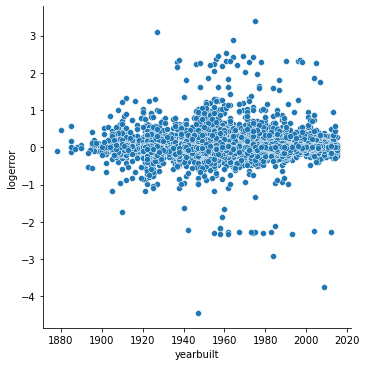

In [22]:
sns.relplot(data=train, x='yearbuilt', y='logerror')

There doesn't appear to be much of a relationship between `yearbuilt` and `logerror`. To be sure, though, I'll run a statistical test.

- $H_{0}$: There is not a significant linear relationship between `yearbuilt` and `logerror`.
- $H_{a}$: There is a significant linear relationship between `yearbuilt` and `logerror`.

In [23]:
alpha = 0.05
corr, p = stats.pearsonr(train.yearbuilt, train.logerror)
corr, p

(-0.005429944398407602, 0.3032643581904352)

#### Answer 2: Based on the visualization and the results of the correlation test, there is not a significant linear relationship between the two variables.

#### Question 3: Is there a relationship between `logerror` and `calculatedfinishedsquarefeet`?

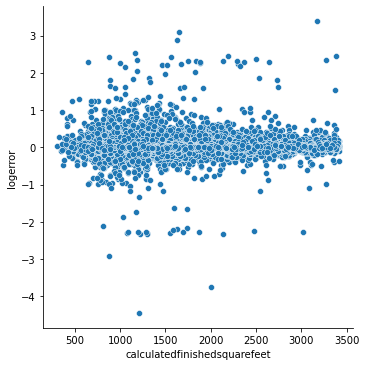

In [24]:
sns.relplot(data=train, x='calculatedfinishedsquarefeet', y='logerror')

At first glance, it appears there is a relationship between `logerror` and `calculatedfinishedsquarefeet`. Next, I'll run a correlation test to be sure there is a significant linear relationship.

- $H_{0}$: There is not a significant linear relationship between `logerror` and `calculatedfinishedsquarefeet`.
- $H_{a}$: There is a significant linear relationship between `logerror` and `calculatedfinishedsquarefeet`.

In [25]:
corr, p = stats.pearsonr(train.logerror, train.calculatedfinishedsquarefeet)
corr, p

(0.02145305258227545, 4.747879872501481e-05)

#### Answer 3: There is a significant linear relationship between `logerror` and `calculatedfinishedsquarefeet`.

Based on the visualization and the results of the correlation test, I conclude there is a significant linear relationship between these two variables. It seems as though smaller homes are more likely to have greater error in their predicted value.

#### Question 4: Does `logerror` differ based on the property's county?

<AxesSubplot:xlabel='fips_loc', ylabel='logerror'>

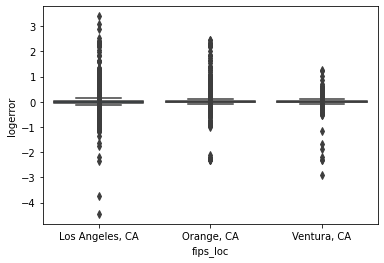

In [26]:
sns.boxplot(data=train, x='fips_loc', y='logerror')

There does appear to be somewhat of a difference in logerror between the three counties included in this data. I'll run a statistical test to be sure.

- $H_{0}$: There is not a significant difference in mean logerror across the three counties.
- $H_{a}$: There is a significant difference in mean logerror across the three counties.

In [27]:
# make separate dataframes for each county's data
la_county_data = train[train.fips_loc == 'Los Angeles, CA']
orange_county_data = train[train.fips_loc == 'Orange, CA']
ventura_county_data = train[train.fips_loc == 'Ventura, CA']

In [31]:
print(f'LA County Logerror Variance: {la_county_data.logerror.var()}')
print(f'Orange County Logerror Variance: {orange_county_data.logerror.var()}')
print(f'Ventura County Logerror Variance: {ventura_county_data.logerror.var()}')

LA County Logerror Variance: 0.022657609222316313
Orange County Logerror Variance: 0.025369090078680667
Ventura County Logerror Variance: 0.01939303846175066


The variances are so small it should be fine to use the ANOVA test to determine if these three counties vary significantly in terms of logerror.

In [32]:
f, p = stats.f_oneway(la_county_data.logerror, orange_county_data.logerror, ventura_county_data.logerror)
f, p

(1.4342639935975672, 0.23830432062962692)

The p-value is greater than alpha (0.05), therefore I fail to reject the null hypothesis.

#### Answer 4: There is not a significant difference in mean logerror across Los Angeles, Orange, and Ventura counties.

#### Question 5: If I control for county (`fips`), does `logerror` differ across `yearbuilt`?

In [ ]:
la_county_data[la_county_data]